Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int', class_names=None, 
    color_mode='rgb', batch_size=batch_size, image_size=(img_height, img_width), shuffle=True, 
    seed=123, validation_split=0.2, subset='training'
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int', class_names=None, 
    color_mode='rgb', batch_size=batch_size, image_size=(img_height, img_width), shuffle=True, 
    seed=123, validation_split=0.2, subset='validation'
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


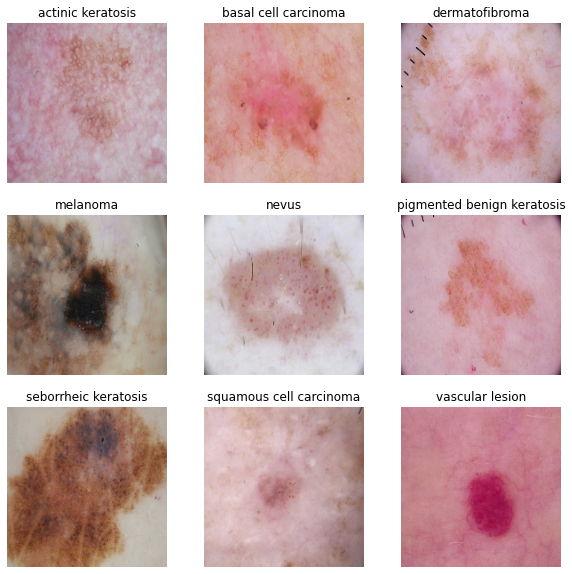

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

def visualise(class_name,n):
  for images, labels in train_ds.take(2):
    for i in range(0,len(labels)):
      if class_names[labels[i]] == class_name:
        ax = plt.subplot(3, 3,n+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        break;
n=0
for label in class_names:
  visualise(label,n)
  n+=1

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
# y_train = tf.keras.utils.to_categorical(y_train, num_classes)
# # y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
### Your code goes here
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, 3, activation='relu'),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  # layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 86, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 84, 84, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 128)       0

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs= epochs
)

Epoch 1/20
14/14 [==============================] - 216s 13s/step - loss: 3.6488 - accuracy: 0.1671 - val_loss: 2.0964 - val_accuracy: 0.1924
Epoch 2/20
14/14 [==============================] - 168s 12s/step - loss: 2.0466 - accuracy: 0.2256 - val_loss: 1.9889 - val_accuracy: 0.2931
Epoch 3/20
14/14 [==============================] - 171s 12s/step - loss: 2.0273 - accuracy: 0.2895 - val_loss: 1.9433 - val_accuracy: 0.3154
Epoch 4/20
14/14 [==============================] - 171s 12s/step - loss: 1.9181 - accuracy: 0.2875 - val_loss: 1.9439 - val_accuracy: 0.2416
Epoch 5/20
14/14 [==============================] - 174s 13s/step - loss: 1.9405 - accuracy: 0.2822 - val_loss: 1.8585 - val_accuracy: 0.3154
Epoch 6/20
14/14 [==============================] - 177s 13s/step - loss: 1.8079 - accuracy: 0.3448 - val_loss: 1.6825 - val_accuracy: 0.3848
Epoch 7/20
14/14 [==============================] - 173s 12s/step - loss: 1.6991 - accuracy: 0.4014 - val_loss: 1.4878 - val_accuracy: 0.4586
Epoch 

### Visualizing training results

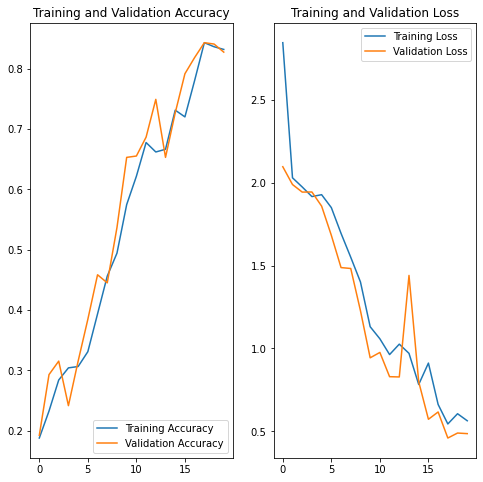

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

The model is showing appropriate results and does not show any overfitting. 
The validation loss is seen to be fluctuating at a few points


In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  # layers.experimental.preprocessing.RandomContrast(0.5),
  layers.experimental.preprocessing.RandomZoom(0.4,0.4),
  # layers.experimental.preprocessing.RandomRotation(0.2),
])

(-0.5, 179.5, 179.5, -0.5)

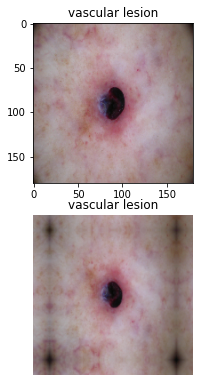

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
training_image, label = next(iter(train_ds))
ax = plt.subplot(3, 3,1)


plt.imshow(training_image[0].numpy().astype("uint8"))
plt.title(class_names[label[0]])

augmented_image = data_augmentation(training_image)
ax = plt.subplot(3, 3, 4)
plt.imshow(augmented_image[0].numpy().astype("uint8"))
plt.title(class_names[label[0]])
plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  layers.Conv2D(32, 3, activation='relu'),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, 3, activation='relu'),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  # layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])


### Compiling the model

In [ ]:
## Your code goes here
model2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs= epochs
)

Epoch 1/20
14/14 [==============================] - 259s 19s/step - loss: 4.7569 - accuracy: 0.1864 - val_loss: 2.0605 - val_accuracy: 0.2036
Epoch 2/20
14/14 [==============================] - 170s 12s/step - loss: 2.0697 - accuracy: 0.2241 - val_loss: 1.8805 - val_accuracy: 0.3177
Epoch 3/20
14/14 [==============================] - 170s 12s/step - loss: 1.8550 - accuracy: 0.3395 - val_loss: 1.8926 - val_accuracy: 0.2998
Epoch 4/20
14/14 [==============================] - 169s 12s/step - loss: 1.9308 - accuracy: 0.2832 - val_loss: 1.7856 - val_accuracy: 0.3356
Epoch 5/20
14/14 [==============================] - 170s 12s/step - loss: 1.7420 - accuracy: 0.3368 - val_loss: 1.6888 - val_accuracy: 0.3915
Epoch 6/20
14/14 [==============================] - 169s 12s/step - loss: 1.6656 - accuracy: 0.3995 - val_loss: 1.6387 - val_accuracy: 0.4027
Epoch 7/20
14/14 [==============================] - 171s 12s/step - loss: 1.5978 - accuracy: 0.4194 - val_loss: 1.5204 - val_accuracy: 0.4251
Epoch 

### Visualizing the results

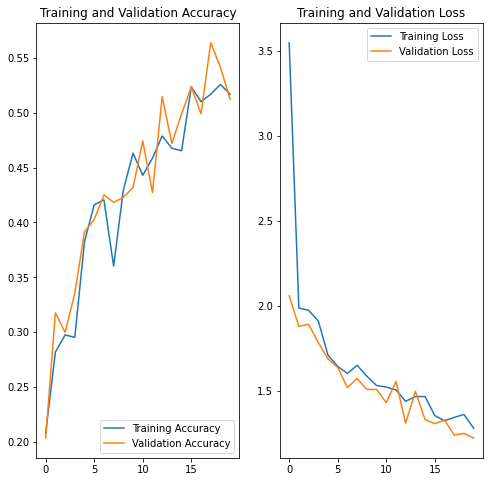

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [12]:
## Your code goes here.
path = "/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
dict1 = {}
dict1.fromkeys(class_names,0)
for label in class_names:
  new_path = pathlib.Path(path+label)
  image_count = len(list(new_path.glob('*/*.jpg')))
  dict1[label]+=image_count


KeyError: ignored

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [ ]:
path_to_training_dataset='/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDE7EFA8090>:   0%|          | 1/500 [00:00<01:22,  6.06 Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDE85387150>: 100%|██████████| 500/500 [00:20<00:00, 24.13 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDE87A9AE10>: 100%|██████████| 500/500 [00:21<00:00, 23.69 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDE853DEF50>: 100%|██████████| 500/500 [00:22<00:00, 22.37 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDE83C66710>: 100%|██████████| 500/500 [01:35<00:00,  5.24 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FDE83BD6550>: 100%|██████████| 500/500 [01:36<00:00,  5.21 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDE83B41110>: 100%|██████████| 500/500 [00:20<00:00, 23.85 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDE9436F0D0>: 100%|██████████| 500/500 [00:48<00:00, 10.34 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FDE7EF79850>:   0%|          | 1/500 [00:00<01:13,  6.78 Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDE85388290>: 100%|██████████| 500/500 [00:30<00:00, 16.46 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDE861C3F90>: 100%|██████████| 500/500 [00:21<00:00, 23.52 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010912.jpg_d807031a-ea01-4905-bc9b-856a92fd2d73.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000314.jpg_ff9d2daf-4785-4778-b29a-4dd37c7489a0.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010579.jpg_901eec3e-4ba2-4aa1-bda2-b0c379a9f1f8.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000482.jpg_88e7798e-8ce2-41d2-9df6-d8c327095605.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010056.jpg_fda8ab78-395b-4051-b30d-99f1

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
original_df=pd.DataFrame()
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

vascular lesion               500
dermatofibroma                500
squamous cell carcinoma       500
seborrheic keratosis          500
pigmented benign keratosis    500
melanoma                      500
basal cell carcinoma          500
actinic keratosis             500
nevus                         500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [6]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [7]:
data_dir_train='/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [9]:
## your code goes here
l1=tf.keras.regularizers.L1()

model3 = tf.keras.Sequential()
model3.add(layers.experimental.preprocessing.Rescaling(1./225))
model3.add(layers.Conv2D(32, 3, activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(layers.Conv2D(64, 3, activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))



model3.add(layers.Conv2D(128, 3, activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(layers.Conv2D(128, 3, activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))

model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu',kernel_regularizer=l1))
model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(9, activation='softmax',kernel_regularizer=l1))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [10]:
## your code goes here
model3.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [11]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model3.fit(train_ds,
                     validation_data=val_ds,
                     epochs = 30,use_multiprocessing=True)
# your model fit code

Epoch 1/30
169/169 [==============================] - 2087s 12s/step - loss: 333.4247 - accuracy: 0.2399 - val_loss: 137.4073 - val_accuracy: 0.1158
Epoch 2/30
169/169 [==============================] - 47s 271ms/step - loss: 110.8826 - accuracy: 0.2804 - val_loss: 84.1420 - val_accuracy: 0.1314
Epoch 3/30
169/169 [==============================] - 47s 270ms/step - loss: 88.0357 - accuracy: 0.3023 - val_loss: 79.0106 - val_accuracy: 0.2257
Epoch 4/30
169/169 [==============================] - 47s 272ms/step - loss: 77.3746 - accuracy: 0.3143 - val_loss: 69.4175 - val_accuracy: 0.2955
Epoch 5/30
169/169 [==============================] - 48s 276ms/step - loss: 71.6257 - accuracy: 0.3279 - val_loss: 58.6621 - val_accuracy: 0.2546
Epoch 6/30
169/169 [==============================] - 47s 270ms/step - loss: 55.8228 - accuracy: 0.3399 - val_loss: 52.6581 - val_accuracy: 0.1604
Epoch 7/30
169/169 [==============================] - 46s 266ms/step - loss: 48.1964 - accuracy: 0.3688 - val_loss:

#### **Todo:**  Visualize the model results

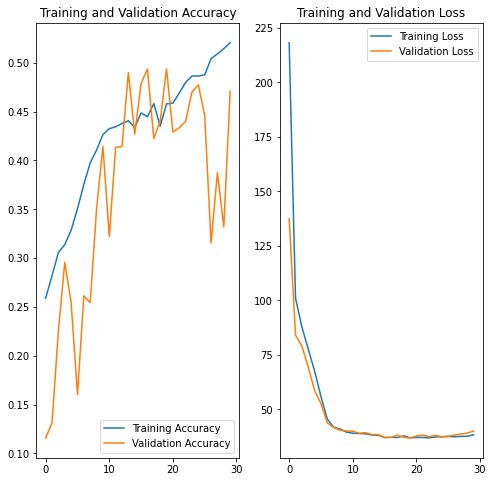

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

